1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Divide the dataset into 2 training and test sets
4. Use logistic model Regression. Try to apply different *solver* and *penalty* to find the best one.
5. Perform model on training set and test set
6. Measure performance of the model.
7. Which metric is your main metric and why? Which solver and penalty have you chosen? (<= 100 words)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

**Submission Link**: https://forms.gle/M2CxqVGrKLTzqR7g9 (Submit your .ipynb file)

- Age: This is the attribute that describes the age of the patient. There is data type $int64$, the highest value is 29, and the lowest is 77.
- Sex: This is the attribute indicating the gender of the patient, where 0 indicates male patient, 1 female patient.
- ChestPainType: This is the attribute that indicates the patient's chest pain level. With levels 0, 1, 2, and 3.
- RestingBP: This is the attribute that indicates the patient's blood pressure with data type $int64$, the value is in the range [94, 200]
- Cholesterol: This attribute indicates the patient's cholesterol level as measured in the hospital. Has the data type $int64$, where the value is in [126, 564]
- FastingBS: This is an attribute that describes the patient's fasting blood sugar. In which, if the patient has more than 120mg/dl sugar = 1, otherwise = 0.
- RestingECG: This property displays the results of the ECG from 0 to 2 (0, 1, 2). Where each value indicates the severity of the pain.
- thalach: Patient's highest heart rate
- ExerciseAngina: Whether or not you have angina during exercise. Yes denotes 1, no denotes 0.
- Oldpeak: Attribute expressing the stress level of the patient. Has a value of type $float64$, the value is in [0, 6.2]
- ST\_Slope: Patient's condition during exercise. Includes [Upsloping, Flat, Down sloping] states that are sequentially digitized to [0, 1, 2].
- ca: number of major vessels (0-3) colored by flourosopy - given
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
- HeartDisease: Results of the patient's condition. 1 is for signs of heart disease, 0 is for no signs of heart disease.

## Load Dataset

In [1]:
!pip install prettytable

In [2]:
!git clone https://github.com/Likelipop/03-IML.git

Cloning into '03-IML'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 48 (delta 20), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (48/48), 2.97 MiB | 5.02 MiB/s, done.
Resolving deltas: 100% (20/20), done.


In [3]:
%cd 03-IML

/content/03-IML


In [4]:
import pandas as pd
PATH = "/content/03-IML/heart.csv" # Path to your file

df = pd.read_csv(PATH)
#ToDo: Show histogram of dataframe

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
1,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
2,71,0,1,160,303,0,1,163,0,0.4,2,2,2,1
3,71,0,1,160,304,0,1,164,0,0.4,2,2,2,1
4,71,0,1,160,305,0,1,165,0,0.4,2,2,2,1


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,54.007901,0.683973,1.005643,132.117381,247.497743,0.168172,0.495485,149.492099,0.310384,1.083296,1.424379,0.714447,2.278781,0.564334
std,9.126292,0.465186,1.024542,16.807511,47.209995,0.374230,0.526669,23.921327,0.462912,1.147935,0.556861,1.028825,0.572576,0.496124
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,245.000000,0.000000,0.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,206.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       886 non-null    int64  
 1   sex       886 non-null    int64  
 2   cp        886 non-null    int64  
 3   trestbps  886 non-null    int64  
 4   chol      886 non-null    int64  
 5   fbs       886 non-null    int64  
 6   restecg   886 non-null    int64  
 7   thalach   886 non-null    int64  
 8   exang     886 non-null    int64  
 9   oldpeak   886 non-null    float64
 10  slope     886 non-null    int64  
 11  ca        886 non-null    int64  
 12  thal      886 non-null    int64  
 13  target    886 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 97.0 KB


## Data Analysis

Firstly, lets see how many numeric columns are there.

In [8]:
numeric_col = df.select_dtypes(include = ['number']).columns
len(numeric_col)

14

Oops, all columns are numeric! but according to prior knowledge, we can consider these columns are numeic:

- **RestingBP**: Patient's resting blood pressure, range: 94–200 mmHg.  
- **Cholesterol**: Measured cholesterol level, range: 126–564 mg/dl.  
- **thalach**: Patient's maximum recorded heart rate.  
- **Oldpeak**: Stress level during exercise, range: 0 to 6.2.


And the rest seem to be categorical, for example:

- **Age**: Patient's age in years, from 29 to 77.  
- **Sex**: Gender of patient: 0 = male, 1 = female.  
- **ChestPainType**: Chest pain level: 0 to 3 severity scale.  
- **FastingBS**: Fasting blood sugar >120mg/dl = 1, else 0.  
- **RestingECG**: ECG result, severity coded from 0 to 2.  
- **ExerciseAngina**: Angina during exercise: 1 = yes, 0 = no.  
- **ST_Slope**: Slope during exercise: up, flat, or down (0–2).  
- **ca**: Count of major vessels colored by fluoroscopy (0–3).  
- **thal**: Thalassemia: 0 = normal, 1 = fixed, 2 = reversible.  
- **HeartDisease**: 1 = heart disease, 0 = no heart disease.

Let's visualize these four numeric values to assess the validity of the claims.

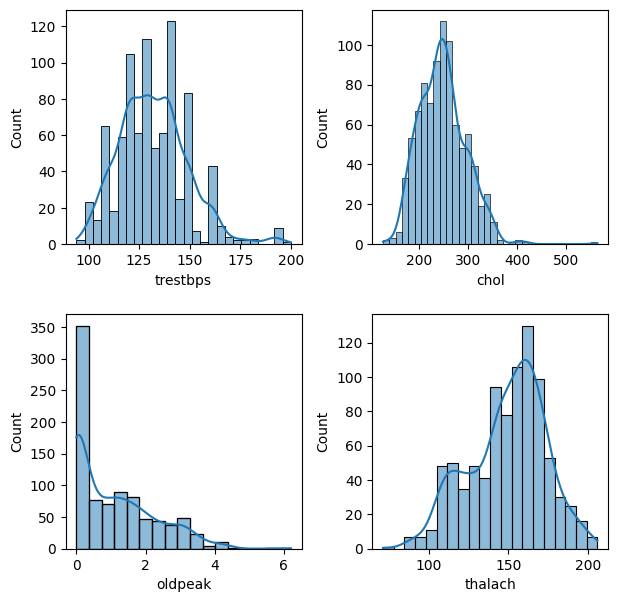

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
#column to distplot
dist_col = ["trestbps","chol","oldpeak","thalach"]

#column to barplot
bar_col = [column for column in df.columns if column not in dist_col]

fig, axis = plt.subplots(2,2,figsize= (7,7))

for i,col in enumerate(dist_col):
    sns.histplot(df[col], ax=axis[i//2, i%2], kde=True)


plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()



In [10]:
df[dist_col].describe()

,trestbps,chol,oldpeak,thalach
count,886.000000,886.000000,886.000000,886.000000
mean,132.117381,247.497743,1.083296,149.492099
std,16.807511,47.209995,1.147935,23.921327
min,94.000000,126.000000,0.000000,71.000000
25%,120.000000,212.000000,0.000000,133.000000
50%,130.000000,245.000000,0.800000,153.000000
75%,140.000000,274.000000,1.800000,166.000000
max,200.000000,564.000000,6.200000,206.000000


As above, we may be able to deduce some trends:

* RestingBP: Most of Patient's resting blood pressure varies between 20 and 150. The distribution are right-skew, and may contains several outliers.

* Cholesterol: cholesterol was ranging from about 180 to over 350,  right-skewed, likely to contain outliers as well.

* thalach: Patient's maximum recorded heart rate was centered at about 150 , left-skew.

* Oldpeak: The figure indicates that stress levels during exercise were generally low, showing a left-skewed distribution, with most values concentrated between 0 and 1, gradually decreasing up to 4.

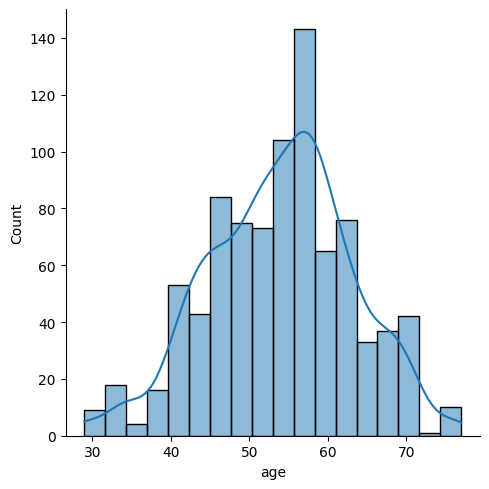

In [11]:
sns.displot(df['age'], kde = True)

Age: This is the attribute that describes the age of the patient. There is data type  int64 , the highest value is 29, and the lowest is 77. Let's visualize some categorical features

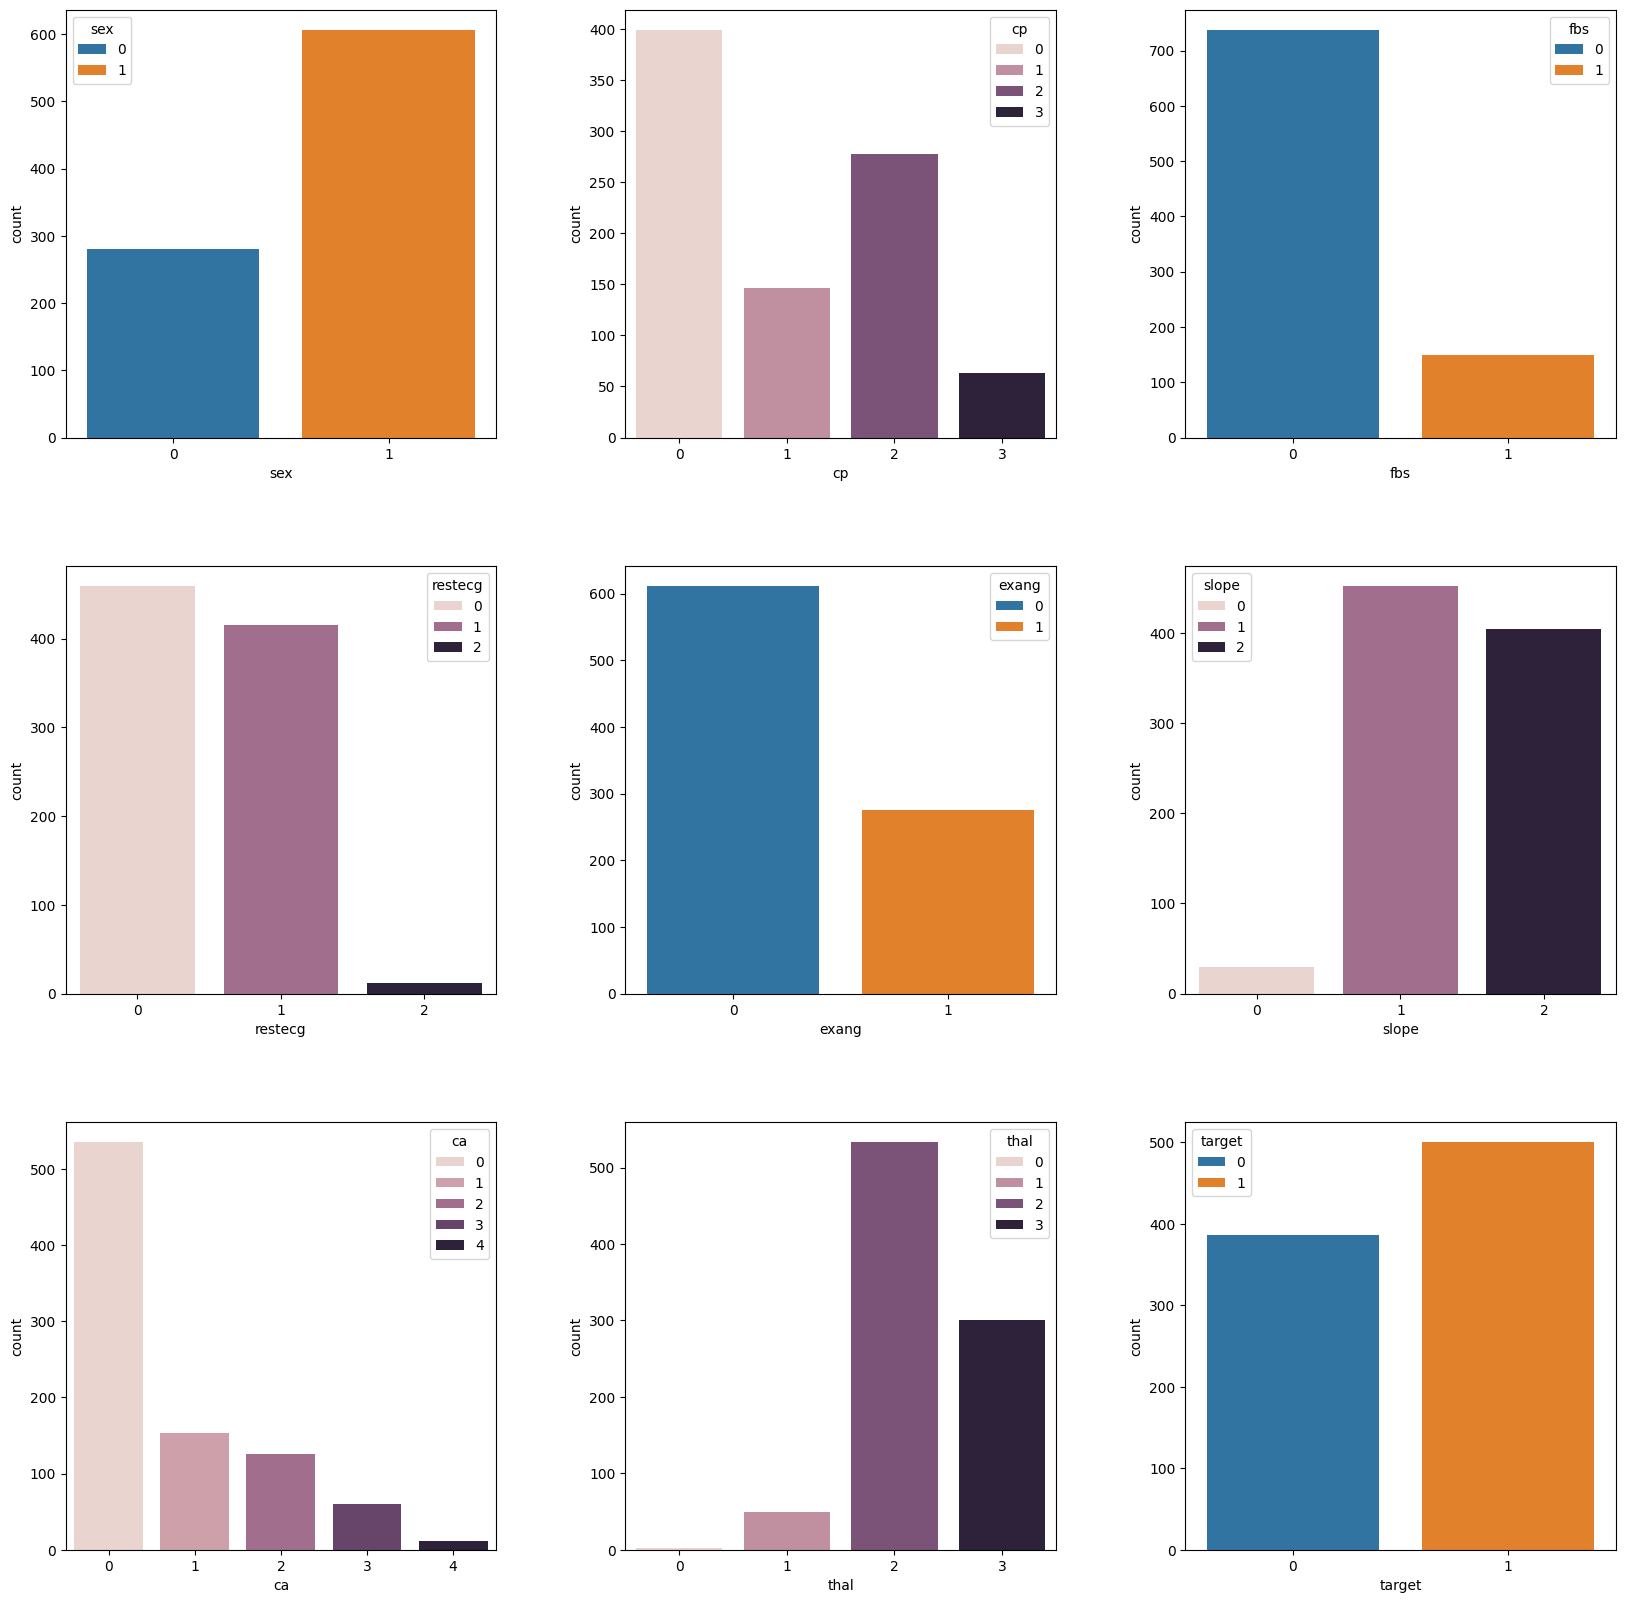

In [12]:
fig, axis = plt.subplots(3,3,figsize = (20,20))

for i,col in enumerate(bar_col[1:]):
  sns.countplot(data = df, x = col, hue =col, ax = axis[i//3,i%3] )

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

<Axes: >

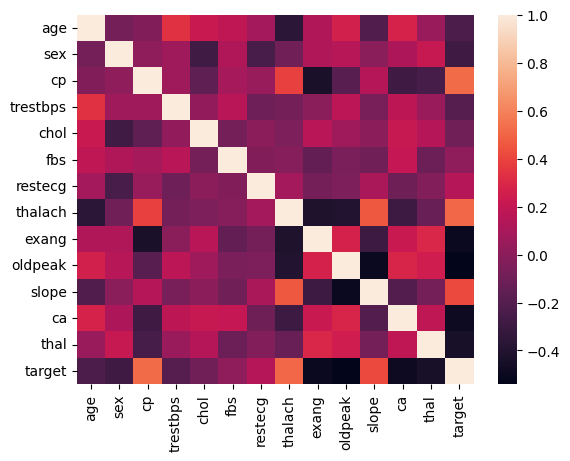

In [13]:
sns.heatmap(df.corr())

## Preprocessing

In [14]:
from sklearn.preprocessing import LabelEncoder

def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Encode education volume as labels
    label_encoder = LabelEncoder()
    df.loc[:, "education"] = label_encoder.fit_transform(df["education"]) # 0 1 2 3 4

    cat_cols = [col for col in df.columns if df[col].dtypes == "O"] # get categorical columns
    cat_cols.remove("y") # Remove target
    # -- Method 1: categorical features -> numberic features using get_dummies()
    temp = pd.get_dummies(df[cat_cols])
    df.drop(cat_cols, axis=1, inplace=True) # Remove category columns
    df = pd.concat([df, temp], axis=1) # nối dataframe data với các giá trị dummy của feature col

    return df


In [15]:
df.isnull().sum().sum()

np.int64(0)

In [16]:
from sklearn.impute import SimpleImputer


def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: preprocess data
    #print out the null count in every colummns
    print(df.isnull().sum())
    total_na = int(df.isnull().sum().sum())
    print(f"total null : {total_na}")

    # ignore if there is no missing values
    if (total_na):
      if (total_na/len(df)) < 0.1:
        df.dropna()
      else:  # using imputer instead
        imputer = SimpleImputer(strategy = 'median')
        df[dist_col] = imputer.fit_transform(df[dist_col])
        df[bar_col] = imputer.fit_transform(df[bar_col])

    return df

In [17]:
df = preprocessing_data(df.copy())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
total null : 0


Great there is no missing values either !

## Feature Engineering

Normalize data !
dummizeee data !


<Axes: >

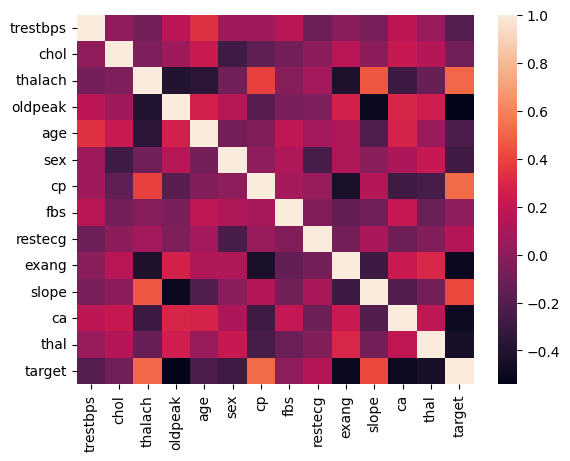

In [18]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pandas as pd

def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """

    #remove

    # Normalize numerical data using StandardScaler (Z-score)
    scaler = StandardScaler()
    df[dist_col] = scaler.fit_transform(df[dist_col])
    print("Normalize data !")

    # As mentioned above, we will transform these categorical columns using one-hot encoding
    temp = pd.get_dummies(df[bar_col])
    df.drop(columns=bar_col, axis=1, inplace=True)
    df = pd.concat([df, temp], axis=1)
    print("dummizeee data !")

    return df

# Apply to your DataFrame
df = apply_feature_engineering(df)

# Plot heatmap
sns.heatmap(df.corr())


In [19]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    X = df.drop(columns=["target"], axis = 1)
    y = df["target"]
    return X, y

X, y = prepare_X_y(df)
print(f"total: {len(X)}\nX : {len(X.columns)} columns \ndf: {len(df.columns)} columns")

total: 886
X : 13 columns 
df: 14 columns


# Apply machine learning model

## Train-test split

In [20]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 42
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

## Build SK-learn model

**By default**

In [21]:
from prettytable import PrettyTable

def print_tabble(report):
    table = PrettyTable()
    table.field_names = ["Class", "Precision", "Recall", "F1-Score", "Support"]

    # Class-level metrics (binary classification: class 0 and 1)
    for label in ["0", "1"]:
        row = report[label]
        table.add_row([
            label,
            f"{row['precision']:.2f}",
            f"{row['recall']:.2f}",
            f"{row['f1-score']:.2f}",
            f"{row['support']:.0f}"
        ])

    # Macro average
    macro = report["macro avg"]
    table.add_row([
        "Macro Avg",
        f"{macro['precision']:.2f}",
        f"{macro['recall']:.2f}",
        f"{macro['f1-score']:.2f}",
        f"{macro['support']:.0f}"
    ])

    # Weighted average
    weighted = report["weighted avg"]
    table.add_row([
        "Weighted Avg",
        f"{weighted['precision']:.2f}",
        f"{weighted['recall']:.2f}",
        f"{weighted['f1-score']:.2f}",
        f"{weighted['support']:.0f}"
    ])

    # Accuracy row
    total_support = int(report['0']['support'] + report['1']['support'])
    table.add_row([
        "Accuracy", "-", "-", f"{report['accuracy']:.2f}", total_support
    ])

    print(table)


In [27]:
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

def build_model(X, y,solver='liblinear', random_state= 42, penalty = 'l2'):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: trained model (pipeline)
    """

    # Create pipeline with scaler and logistic regression
    model = make_pipeline(
        StandardScaler(),
        LogisticRegression(solver=solver,
                           random_state=random_state,
                           penalty = penalty))

    # Train the model
    model.fit(X, y)

    return model


def calculate_performance(y_true, y_pred):
    """
    :param y_true: ground truth values
    :param y_pred: predictions
    :return:
    """
    # Todo: return your error value like accuracy, f1score, ...
    report = classification_report(y_true, y_pred, output_dict=True)

    print_tabble(report)  # Make sure this is defined above
    print("precision", report["weighted avg"]['precision'])
    print("recall", report["weighted avg"]['recall'])
    print("accuracy", report['accuracy'])
    print("F1", report["weighted avg"]['f1-score'])

    # Todo: Only choose one of them as your score for the question 7
    main_score = report["weighted avg"]['f1-score']
    return main_score

model = build_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(testX)

In [28]:
calculate_performance(testY,pred)

+--------------+-----------+--------+----------+---------+
|    Class     | Precision | Recall | F1-Score | Support |
+--------------+-----------+--------+----------+---------+
|      0       |    0.96   |  0.94  |   0.95   |   114   |
|      1       |    0.95   |  0.97  |   0.96   |   152   |
|  Macro Avg   |    0.95   |  0.95  |   0.95   |   266   |
| Weighted Avg |    0.95   |  0.95  |   0.95   |   266   |
|   Accuracy   |     -     |   -    |   0.95   |   266   |
+--------------+-----------+--------+----------+---------+
precision 0.9548933209647497
recall 0.9548872180451128
accuracy 0.9548872180451128
F1 0.9548350313576759


0.9548350313576759

**Trying several penalty**

In [31]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'saga']

for solver in solvers:
  print(f"\nsolver = {solver}")
  model = build_model(trainX, trainY, solver = solver)
  # Compare on training dataset
  pred = model.predict(testX)
  calculate_performance(testY,pred)


solver = lbfgs
+--------------+-----------+--------+----------+---------+
|    Class     | Precision | Recall | F1-Score | Support |
+--------------+-----------+--------+----------+---------+
|      0       |    0.96   |  0.94  |   0.95   |   114   |
|      1       |    0.95   |  0.97  |   0.96   |   152   |
|  Macro Avg   |    0.95   |  0.95  |   0.95   |   266   |
| Weighted Avg |    0.95   |  0.95  |   0.95   |   266   |
|   Accuracy   |     -     |   -    |   0.95   |   266   |
+--------------+-----------+--------+----------+---------+
precision 0.9548933209647497
recall 0.9548872180451128
accuracy 0.9548872180451128
F1 0.9548350313576759

solver = liblinear
+--------------+-----------+--------+----------+---------+
|    Class     | Precision | Recall | F1-Score | Support |
+--------------+-----------+--------+----------+---------+
|      0       |    0.96   |  0.94  |   0.95   |   114   |
|      1       |    0.95   |  0.97  |   0.96   |   152   |
|  Macro Avg   |    0.95   |  0.9

In [34]:
penalties = ['l1', 'l2','elasticnet',None]

for penalty in penalties:
  print(f"\penalty = {penalty}")
  model = build_model(trainX, trainY, penalty=penalty, solver = 'saga')
  # Compare on training dataset
  pred = model.predict(testX)
  calculate_performance(testY,pred)

\penalty = l1
+--------------+-----------+--------+----------+---------+
|    Class     | Precision | Recall | F1-Score | Support |
+--------------+-----------+--------+----------+---------+
|      0       |    0.96   |  0.94  |   0.95   |   114   |
|      1       |    0.95   |  0.97  |   0.96   |   152   |
|  Macro Avg   |    0.95   |  0.95  |   0.95   |   266   |
| Weighted Avg |    0.95   |  0.95  |   0.95   |   266   |
|   Accuracy   |     -     |   -    |   0.95   |   266   |
+--------------+-----------+--------+----------+---------+
precision 0.9548933209647497
recall 0.9548872180451128
accuracy 0.9548872180451128
F1 0.9548350313576759
\penalty = l2
+--------------+-----------+--------+----------+---------+
|    Class     | Precision | Recall | F1-Score | Support |
+--------------+-----------+--------+----------+---------+
|      0       |    0.96   |  0.94  |   0.95   |   114   |
|      1       |    0.95   |  0.97  |   0.96   |   152   |
|  Macro Avg   |    0.95   |  0.95  |   0

ValueError: l1_ratio must be specified when penalty is elasticnet.

In [ ]:
def get_conclusion():
    # Todo: Please return your answer, conclusion and opinion right here
    return "7. " \
           "Other conclusion: "